In [1]:
import numpy as np
import pylab as pb
import GPy

pb.ion()

In [2]:
X = np.load("hc_baby.npy", allow_pickle=True)
Y = np.log(np.load("samples_baby.npy", allow_pickle=True))

In [3]:
scale_factor = np.load("standard_k.npy", allow_pickle=True)
len(X)

100

In [5]:
kernel = GPy.kern.RBF(input_dim=6, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(X,Y,kernel)

In [6]:
m.constrain_positive('') # '' is a regex matching all parameter names
m.optimize()

In [7]:
# Remember that the structure of a hc entry is
# omb, omc, ns, s12, omnu, As
x = np.array([np.array([
    0.022445, 0.120567, 0.96, 0.82466774, 0, 2.12723788013000E-09
])])
x

array([[2.24450000e-02, 1.20567000e-01, 9.60000000e-01, 8.24667740e-01,
        0.00000000e+00, 2.12723788e-09]])

In [8]:
guess, uncertainties = m.predict(x)

Text(0.5, 0, 'scale factor k')

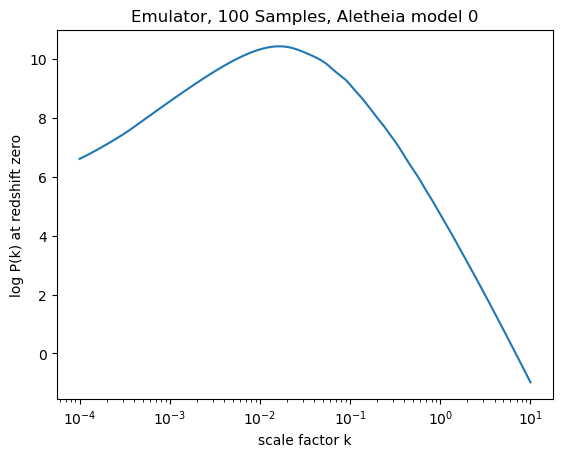

In [9]:
#import matplotlib.pyplot as plt
pb.plot(scale_factor, guess[0])
pb.title("Emulator, 100 Samples, Aletheia model 0")
pb.xscale('log')
pb.ylabel('log P(k) at redshift zero')
pb.xlabel('scale factor k')

In [10]:
# Now let's check our work with battery
import importlib.util
import sys
spec = importlib.util.spec_from_file_location(
    "spectra", "../shared/spectra.py")
spectra = importlib.util.module_from_spec(spec)
sys.modules["spectra"] = spectra
spec.loader.exec_module(spectra)

k_m0truth, z_m0truth, p_m0truth, s_m0truth = \
    spectra.kzps(spectra.cosm.iloc[0], 0)
print(s_m0truth)

[0.82466774]


Next steps:
* Import "ground truth": what the plot was really supposed to look like for model 0
* Play with omega_nu, n_s, omega_nu + omega_cdm to see if you can get the same behavior as in the animations

Text(0.5, 0, 'scale factor k')

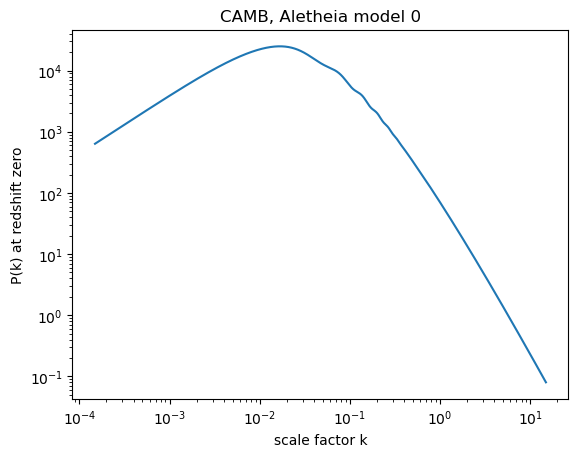

In [11]:
#import matplotlib.pyplot as plt
pb.loglog(k_m0truth, p_m0truth)
pb.title("CAMB, Aletheia model 0")
pb.ylabel('P(k) at redshift zero')
pb.xlabel('scale factor k')

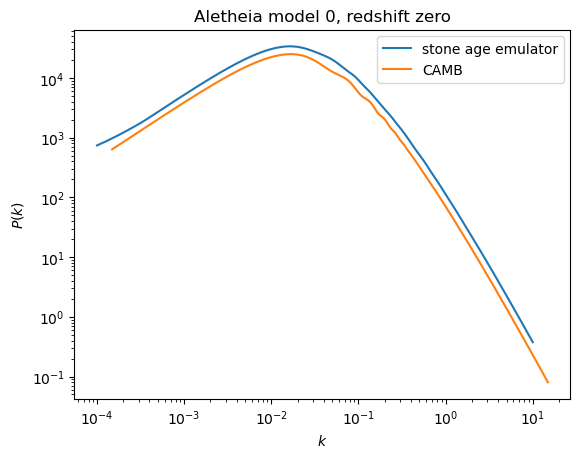

In [12]:
pb.plot(scale_factor, np.exp(guess[0]), label="stone age emulator")
pb.loglog(k_m0truth, p_m0truth, label="CAMB")
pb.title("Aletheia model 0, redshift zero")
pb.ylabel('$P(k)$')
pb.xlabel('$k$')
pb.legend()

In [13]:
# Remember that the structure of a hc entry is
# omb, omc, ns, s12, omnu, As
x_hi_ns = np.array([np.array([
    0.022445, 0.120567, 1.1, 0.82466774, 0, 2.12723788013000E-09
])])
guess_hi_ns, uncertainties_hi_ns = m.predict(x_hi_ns)
x_lo_ns = np.array([np.array([
    0.022445, 0.120567, 0.84, 0.82466774, 0, 2.12723788013000E-09
])])
guess_lo_ns, uncertainties_lo_ns = m.predict(x_lo_ns)

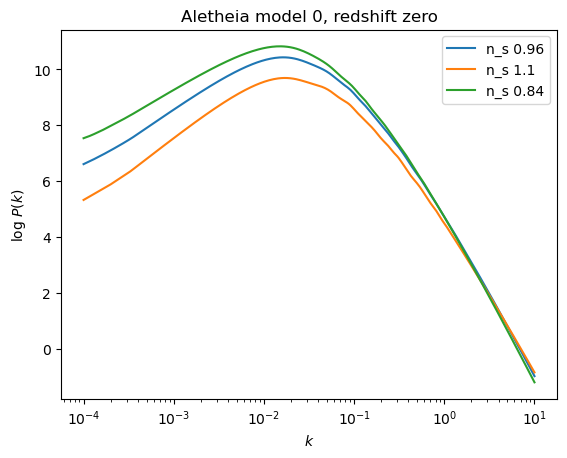

In [14]:
pb.plot(scale_factor, guess[0], label="n_s 0.96")
pb.plot(scale_factor, guess_hi_ns[0], label="n_s 1.1")
pb.plot(scale_factor, guess_lo_ns[0], label="n_s 0.84")

pb.xscale('log')

pb.title("Aletheia model 0, redshift zero")
pb.ylabel('log $P(k)$')
pb.xlabel('$k$')
pb.legend()

In [15]:
# Remember that the structure of a hc entry is
# omb, omc, ns, s12, omnu, As
omnu_hi = 0.01
x_hi_omnu = np.array([np.array([
    0.022445, 0.120567 - omnu_hi, 0.96, 0.82466774, omnu_hi,\
    2.12723788013000E-09
])])
guess_hi_omnu, uncertainties_hi_omnu = m.predict(x_hi_omnu)

omnu_mid = 0.002148659574468
x_mid_omnu = np.array([np.array([
    0.022445, 0.120567 - omnu_mid, 0.96, 0.82466774, omnu_mid, \
    2.12723788013000E-09
])])
guess_mid_omnu, uncertainties_mid_omnu = m.predict(x_mid_omnu)


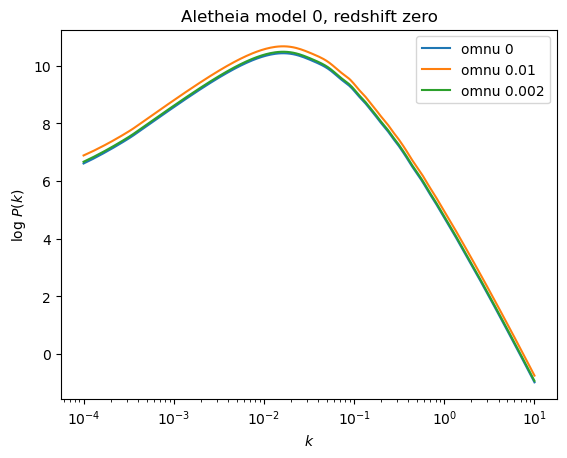

In [16]:
pb.plot(scale_factor, guess[0], label="omnu 0")
pb.plot(scale_factor, guess_hi_omnu[0], label="omnu 0.01")
pb.plot(scale_factor, guess_mid_omnu[0], label="omnu 0.002")

pb.xscale('log')

pb.title("Aletheia model 0, redshift zero")
pb.ylabel('log $P(k)$')
pb.xlabel('$k$')
pb.legend()

In [17]:
# Remember that the structure of a hc entry is
# omb, omc, ns, s12, omnu, As
hi_factor = 1.15
x_hi_omm = np.array([np.array([
    0.022445 * hi_factor, 0.120567 * hi_factor, 0.96, 0.82466774, 0,\
    2.12723788013000E-09
])])
guess_hi_omm, uncertainties_hi_omm = m.predict(x_hi_omm)

lo_factor = 0.85
x_lo_omm = np.array([np.array([
    0.022445 * lo_factor, 0.120567 * lo_factor, 0.96, 0.82466774, 0, \
    2.12723788013000E-09
])])
guess_lo_omm, uncertainties_lo_omm = m.predict(x_lo_omm)


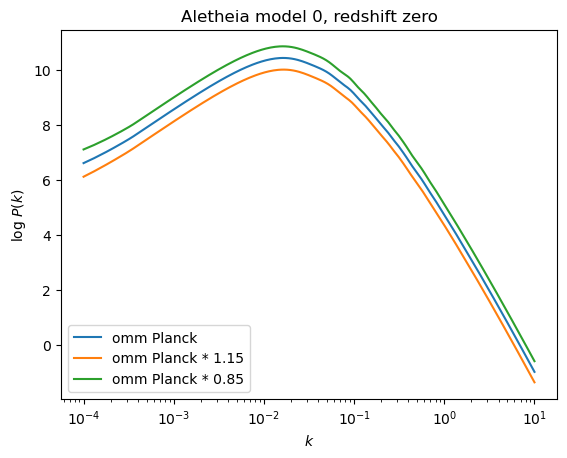

In [18]:
pb.plot(scale_factor, guess[0], label="omm Planck")
pb.plot(scale_factor, guess_hi_omm[0], label="omm Planck * 1.15")
pb.plot(scale_factor, guess_lo_omm[0], label="omm Planck * 0.85")

pb.xscale('log')

pb.title("Aletheia model 0, redshift zero")
pb.ylabel('log $P(k)$')
pb.xlabel('$k$')
pb.legend()

In [19]:
# Remember that the structure of a hc entry is
# omb, omc, ns, s12, omnu, As
x_hi_As = np.array([np.array([
    0.022445, 0.120567, 0.96, 0.82466774, 0, np.exp(3.91) / 10 ** 10
])])
guess_hi_As, uncertainties_hi_As = m.predict(x_hi_As)
x_lo_As = np.array([np.array([
    0.022445, 0.120567, 0.96, 0.82466774, 0, np.exp(2.35) / 10 ** 10 
])])
guess_lo_As, uncertainties_lo_As = m.predict(x_lo_As)

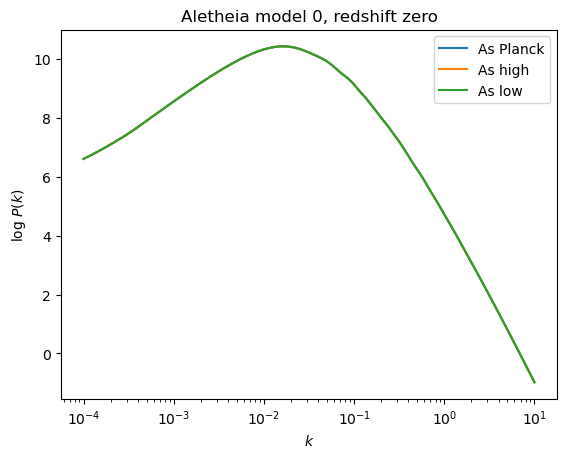

In [20]:
pb.plot(scale_factor, guess[0], label="As Planck")
pb.plot(scale_factor, guess_hi_As[0], label="As high")
pb.plot(scale_factor, guess_lo_As[0], label="As low")

pb.xscale('log')

pb.title("Aletheia model 0, redshift zero")
pb.ylabel('log $P(k)$')
pb.xlabel('$k$')
pb.legend()

I guess this shows that sigma12 countermands As, huh?